# Deep Learning CS6073 Assignment 12
    Akhil Devarashetti
    04/22/2020

### Question

    DL48.py enhances a selected channel in a CNN on an input image, in this case a randomly generated one.
    Run this with num_steps 100-300 to see what you can get.
    Submit your screenshots showing the channel values over the steps and the final image with channel number.  

    Replace the random input_img with a JPG image of your choose
    (see DL40.py about how to read and use a JPG file) and 
    do the same and show the final image.


---
# DL48.py

In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [2]:
inception3 = torchvision.models.inception_v3(pretrained=True)
input_img = torch.randn([1, 3, 128, 128])
unloader = transforms.ToPILImage()

model = nn.Sequential()

iter = inception3.children()
for i in range(5):
    model.add_module('layer{}'.format(i), next(next(iter).children()))

In [3]:
output = model(input_img)
a, b, c, d = output.size()
m = torch.mean(output.view(a * b, c * d), 1)
channel = m.argmax()
print(channel, m[channel])

optimizer = optim.LBFGS([input_img.requires_grad_()])

tensor(26) tensor(0.6250, grad_fn=<SelectBackward>)


In [4]:
for s in range(250):
    
    def closure():
        input_img.data.clamp_(0, 1)

        optimizer.zero_grad()
        output = model(input_img)
        channelvalue = -torch.mean(output[0][channel])
        channelvalue.backward()
        return channelvalue

    optimizer.step(closure)
    print(s, torch.mean(model(input_img)[0][channel]))
    

0 tensor(1.2373, grad_fn=<MeanBackward0>)
1 tensor(3.3051, grad_fn=<MeanBackward0>)
2 tensor(5.3075, grad_fn=<MeanBackward0>)
3 tensor(7.2431, grad_fn=<MeanBackward0>)
4 tensor(9.1090, grad_fn=<MeanBackward0>)
5 tensor(10.9037, grad_fn=<MeanBackward0>)
6 tensor(12.6283, grad_fn=<MeanBackward0>)
7 tensor(14.2794, grad_fn=<MeanBackward0>)
8 tensor(15.8561, grad_fn=<MeanBackward0>)
9 tensor(17.3249, grad_fn=<MeanBackward0>)
10 tensor(18.6912, grad_fn=<MeanBackward0>)
11 tensor(19.9697, grad_fn=<MeanBackward0>)
12 tensor(21.1532, grad_fn=<MeanBackward0>)
13 tensor(22.2596, grad_fn=<MeanBackward0>)
14 tensor(23.2796, grad_fn=<MeanBackward0>)
15 tensor(24.0561, grad_fn=<MeanBackward0>)
16 tensor(24.6380, grad_fn=<MeanBackward0>)
17 tensor(25.1846, grad_fn=<MeanBackward0>)
18 tensor(25.6975, grad_fn=<MeanBackward0>)
19 tensor(26.1840, grad_fn=<MeanBackward0>)
20 tensor(26.6474, grad_fn=<MeanBackward0>)
21 tensor(27.0895, grad_fn=<MeanBackward0>)
22 tensor(27.5042, grad_fn=<MeanBackward0>)
23 

185 tensor(32.6386, grad_fn=<MeanBackward0>)
186 tensor(32.6407, grad_fn=<MeanBackward0>)
187 tensor(32.6427, grad_fn=<MeanBackward0>)
188 tensor(32.6447, grad_fn=<MeanBackward0>)
189 tensor(32.6468, grad_fn=<MeanBackward0>)
190 tensor(32.6488, grad_fn=<MeanBackward0>)
191 tensor(32.6508, grad_fn=<MeanBackward0>)
192 tensor(32.6528, grad_fn=<MeanBackward0>)
193 tensor(32.6548, grad_fn=<MeanBackward0>)
194 tensor(32.6568, grad_fn=<MeanBackward0>)
195 tensor(32.6588, grad_fn=<MeanBackward0>)
196 tensor(32.6608, grad_fn=<MeanBackward0>)
197 tensor(32.6628, grad_fn=<MeanBackward0>)
198 tensor(32.6648, grad_fn=<MeanBackward0>)
199 tensor(32.6668, grad_fn=<MeanBackward0>)
200 tensor(32.6687, grad_fn=<MeanBackward0>)
201 tensor(32.6707, grad_fn=<MeanBackward0>)
202 tensor(32.6727, grad_fn=<MeanBackward0>)
203 tensor(32.6746, grad_fn=<MeanBackward0>)
204 tensor(32.6766, grad_fn=<MeanBackward0>)
205 tensor(32.6785, grad_fn=<MeanBackward0>)
206 tensor(32.6805, grad_fn=<MeanBackward0>)
207 tensor

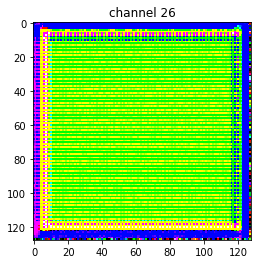

In [5]:
plt.figure()
plt.imshow(unloader(input_img.squeeze(0)))
plt.title('channel {}'.format(channel))
plt.show()

In [ ]:
imsize= 128

loader = transforms.Compose([transforms.Resize(imsize),  # scale imported image    
                             transforms.ToTensor()])  # transform it into a torch tensor
def image_loader(image_name):    
    image = Image.open(image_name)    # fake batch dimension required to fit network's input dimensions    
    image = loader(image).unsqueeze(0)    
    return image


In [ ]:
input_img = image_loader("img1.jpg")

In [ ]:
input_img.shape

In [ ]:
output = model(input_img)
a, b, c, d = output.size()
m = torch.mean(output.view(a * b, c * d), 1)
channel = m.argmax()
print(channel, m[channel])

optimizer = optim.LBFGS([input_img.requires_grad_()])

In [ ]:
for s in range(250):
    
    def closure():
        input_img.data.clamp_(0, 1)

        optimizer.zero_grad()
        output = model(input_img)
        channelvalue = -torch.mean(output[0][channel])
        channelvalue.backward()
        return channelvalue

    optimizer.step(closure)
    print(s, torch.mean(model(input_img)[0][channel]))

In [ ]:
plt.figure()
plt.imshow(unloader(input_img.squeeze(0)))
plt.title('channel {}'.format(channel))
plt.show()

In [7]:
input_img = image_loader("img1.jpg")

In [8]:
input_img.shape

torch.Size([1, 3, 128, 128])

In [9]:
output = model(input_img)
a, b, c, d = output.size()
m = torch.mean(output.view(a * b, c * d), 1)
channel = m.argmax()
print(channel, m[channel])

optimizer = optim.LBFGS([input_img.requires_grad_()])

tensor(112) tensor(56.0568, grad_fn=<SelectBackward>)


In [10]:
for s in range(250):
    
    def closure():
        input_img.data.clamp_(0, 1)

        optimizer.zero_grad()
        output = model(input_img)
        channelvalue = -torch.mean(output[0][channel])
        channelvalue.backward()
        return channelvalue

    optimizer.step(closure)
    print(s, torch.mean(model(input_img)[0][channel]))

0 tensor(62.5387, grad_fn=<MeanBackward0>)
1 tensor(68.9060, grad_fn=<MeanBackward0>)
2 tensor(74.9167, grad_fn=<MeanBackward0>)
3 tensor(80.5329, grad_fn=<MeanBackward0>)
4 tensor(85.6792, grad_fn=<MeanBackward0>)
5 tensor(90.2966, grad_fn=<MeanBackward0>)
6 tensor(94.3905, grad_fn=<MeanBackward0>)
7 tensor(98.0160, grad_fn=<MeanBackward0>)
8 tensor(101.2474, grad_fn=<MeanBackward0>)
9 tensor(104.1155, grad_fn=<MeanBackward0>)
10 tensor(106.6338, grad_fn=<MeanBackward0>)
11 tensor(108.7389, grad_fn=<MeanBackward0>)
12 tensor(110.4581, grad_fn=<MeanBackward0>)
13 tensor(111.7804, grad_fn=<MeanBackward0>)
14 tensor(112.7880, grad_fn=<MeanBackward0>)
15 tensor(113.5589, grad_fn=<MeanBackward0>)
16 tensor(114.0639, grad_fn=<MeanBackward0>)
17 tensor(114.4438, grad_fn=<MeanBackward0>)
18 tensor(114.7759, grad_fn=<MeanBackward0>)
19 tensor(115.0667, grad_fn=<MeanBackward0>)
20 tensor(115.2895, grad_fn=<MeanBackward0>)
21 tensor(115.4440, grad_fn=<MeanBackward0>)
22 tensor(115.5804, grad_fn=

181 tensor(117.3720, grad_fn=<MeanBackward0>)
182 tensor(117.0178, grad_fn=<MeanBackward0>)
183 tensor(117.0180, grad_fn=<MeanBackward0>)
184 tensor(117.0180, grad_fn=<MeanBackward0>)
185 tensor(117.3727, grad_fn=<MeanBackward0>)
186 tensor(117.0185, grad_fn=<MeanBackward0>)
187 tensor(117.0187, grad_fn=<MeanBackward0>)
188 tensor(117.0190, grad_fn=<MeanBackward0>)
189 tensor(117.0190, grad_fn=<MeanBackward0>)
190 tensor(117.0190, grad_fn=<MeanBackward0>)
191 tensor(117.0191, grad_fn=<MeanBackward0>)
192 tensor(117.0192, grad_fn=<MeanBackward0>)
193 tensor(117.0193, grad_fn=<MeanBackward0>)
194 tensor(117.0194, grad_fn=<MeanBackward0>)
195 tensor(117.0194, grad_fn=<MeanBackward0>)
196 tensor(117.0195, grad_fn=<MeanBackward0>)
197 tensor(117.0195, grad_fn=<MeanBackward0>)
198 tensor(117.0196, grad_fn=<MeanBackward0>)
199 tensor(117.0197, grad_fn=<MeanBackward0>)
200 tensor(117.0198, grad_fn=<MeanBackward0>)
201 tensor(117.0199, grad_fn=<MeanBackward0>)
202 tensor(117.0199, grad_fn=<Mean

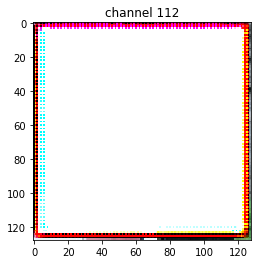

In [11]:
plt.figure()
plt.imshow(unloader(input_img.squeeze(0)))
plt.title('channel {}'.format(channel))
plt.show()